### Telco Customer Churn Analysis And Prediction 
#### By : Shivam Singh

In [54]:
# Import manipulation library
import numpy as np
import pandas as pd

# Import visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Data logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
#3. Import OrderDict()
from collections import OrderedDict

In [55]:
# Data Ingestion
df = pd.read_csv(r'C:\15Days15Project\Telco-Customer-Churn-Analysis-and-Prediction\data\raw\Telco-Customer-Churn.csv')

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
# Descriptive stats

def descriptive_stats():
    numerical_col = df.select_dtypes(exclude = 'object').columns
    categorica_col = df.select_dtypes(include = 'object').columns
    num_stats = []
    cat_stats = []
    data_info = []

    for i in numerical_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1 
        LF = Q1 - 1.5*IQR
        UF = Q3 + 1.5*IQR

        outlier_count = len(df[(df[i] < LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) * 100

        numerical_stats = OrderedDict({
            "Feature " : i ,
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)
    for i in categorica_col:
        categorical_stats = OrderedDict({
            "Feature" : i , 
            "Unquie count" : df[i].nunique(),
            "Value count" : df[i].value_counts(),
            "mode" : df[i].mode()
        })
        cat_stats.append(categorical_stats)
    categorical_stats_report = pd.DataFrame(cat_stats)


    for i in df.columns : 
        data1 = OrderedDict({
            "Feature" : i ,
            "Missing value" : df[i].isnull().sum(),
            "Unqiue value" : df[i].nunique(),
            "value count " : df[i].value_counts().to_dict()
        })
        data_info.append(data1)
    data_info_report = pd.DataFrame(data_info)

    return categorical_stats_report,numerical_stats_report,data_info_report

categorical_stats_report,numerical_stats_report,data_info_report = descriptive_stats()

In [59]:
# numerical stats
numerical_stats_report

,Feature,Q1,Q3,IQR,LF,UF,Mean,Median,Min,Max,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,SeniorCitizen,0.0,0.00,0.00,0.000,0.000,0.162147,0.00,0.00,1.00,1142,16.214681,0.368612,0.135875,1.833633,1.362596
1,tenure,9.0,55.00,46.00,-60.000,124.000,32.371149,29.00,0.00,72.00,0,0.000000,24.559481,603.168108,0.239540,-1.387372
2,MonthlyCharges,35.5,89.85,54.35,-46.025,171.375,64.761692,70.35,18.25,118.75,0,0.000000,30.090047,905.410934,-0.220524,-1.257260


In [60]:
# categorical stats
categorical_stats_report

,Feature,Unquie count,Value count,mode
0,customerID,7043,customerID 7590-VHVEG 1 5575-GNVDE 1 366...,0 0002-ORFBO 1 0003-MKNFE 2 ...
1,gender,2,gender Male 3555 Female 3488 Name: cou...,"0 Male Name: gender, dtype: object"
2,Partner,2,"Partner No 3641 Yes 3402 Name: count, d...","0 No Name: Partner, dtype: object"
3,Dependents,2,Dependents No 4933 Yes 2110 Name: count...,"0 No Name: Dependents, dtype: object"
4,PhoneService,2,PhoneService Yes 6361 No 682 Name: cou...,"0 Yes Name: PhoneService, dtype: object"
5,MultipleLines,3,MultipleLines No 3390 Yes ...,"0 No Name: MultipleLines, dtype: object"
6,InternetService,3,InternetService Fiber optic 3096 DSL ...,"0 Fiber optic Name: InternetService, dtype:..."
7,OnlineSecurity,3,OnlineSecurity No 3498 Yes...,"0 No Name: OnlineSecurity, dtype: object"
8,OnlineBackup,3,OnlineBackup No 3088 Yes ...,"0 No Name: OnlineBackup, dtype: object"
9,DeviceProtection,3,DeviceProtection No 3095 Y...,"0 No Name: DeviceProtection, dtype: object"


In [61]:
# data info 
data_info_report

,Feature,Missing value,Unqiue value,value count
0,customerID,0,7043,"{'7590-VHVEG': 1, '5575-GNVDE': 1, '3668-QPYBK..."
1,gender,0,2,"{'Male': 3555, 'Female': 3488}"
2,SeniorCitizen,0,2,"{0: 5901, 1: 1142}"
3,Partner,0,2,"{'No': 3641, 'Yes': 3402}"
4,Dependents,0,2,"{'No': 4933, 'Yes': 2110}"
5,tenure,0,73,"{1: 613, 72: 362, 2: 238, 3: 200, 4: 176, 71: ..."
6,PhoneService,0,2,"{'Yes': 6361, 'No': 682}"
7,MultipleLines,0,3,"{'No': 3390, 'Yes': 2971, 'No phone service': ..."
8,InternetService,0,3,"{'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}"
9,OnlineSecurity,0,3,"{'No': 3498, 'Yes': 2019, 'No internet service..."


Data Insights:
1. Churn is target column
2. Data is non-normal distributed 
3. There is imbalance in the data

In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [63]:
df.drop(columns=['customerID'], inplace=True)

In [64]:
df['TotalCharges'].fillna(0, inplace=True)

In [65]:
df['Churn'].value_counts(normalize= True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [66]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Correlation Heatmap')

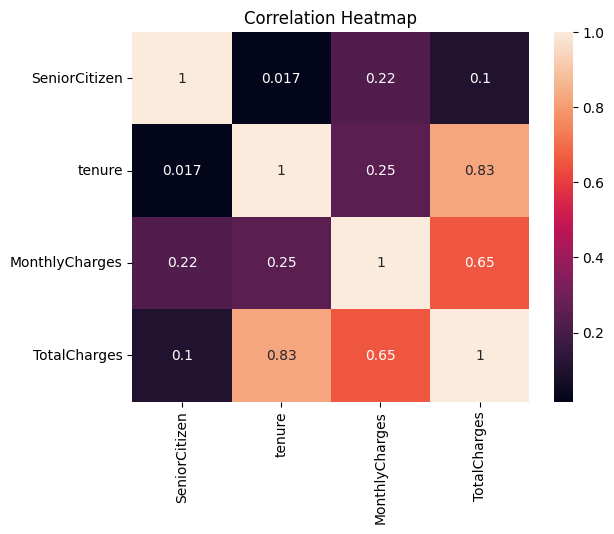

In [67]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")

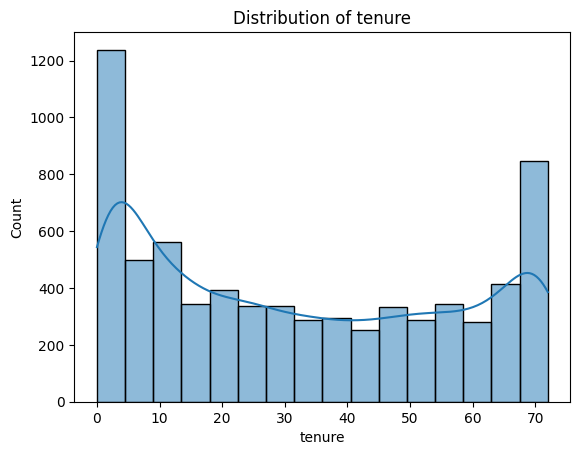

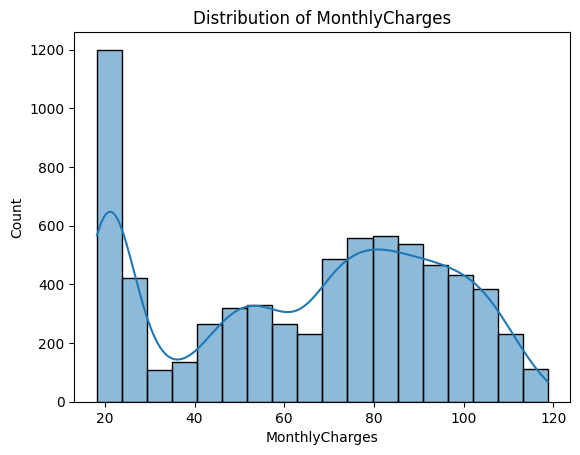

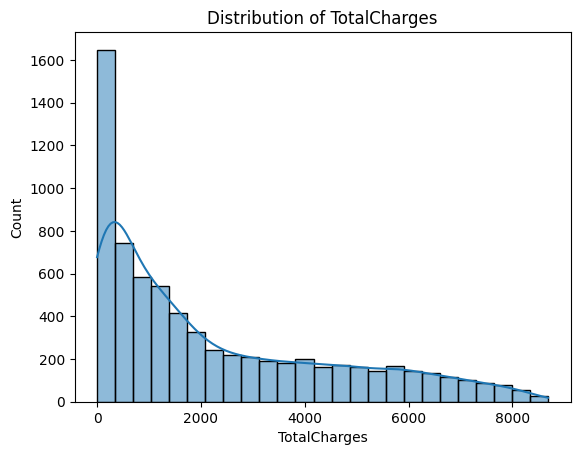

In [68]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [69]:
def churn_rate(col):
    return (
        df.groupby(col)['Churn']
        .apply(lambda x: (x == 'Yes').mean() * 100)
        .sort_values(ascending=False)
    )

churn_rate('Contract')

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

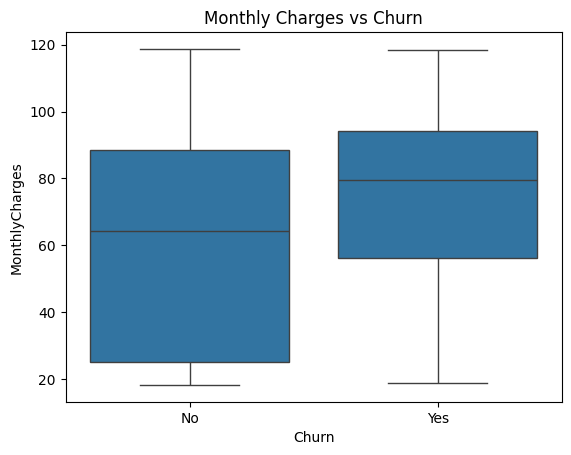

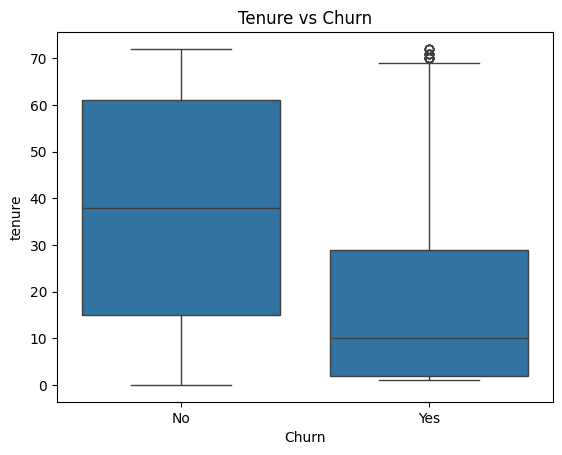

In [70]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

In [71]:
# Binary Encoding 

binary_cols = [
    'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'Churn'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [72]:
service_cols = [
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

for col in service_cols:
    df[col] = df[col].replace({
        'Yes': 1,
        'No': 0,
        'No internet service': 0
    })

In [73]:
# Multiclass column 
df = pd.get_dummies(
    df,
    columns=['Contract', 'InternetService', 'PaymentMethod', 'gender'],
    drop_first=True
)

In [74]:
# Average spend per month
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)

# Customer lifecycle stage
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

df = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)

In [75]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'AvgMonthlySpend', 'TenureGroup_1-2yr',
       'TenureGroup_2-4yr', 'TenureGroup_4-6yr'],
      dtype='object')

In [80]:
# Preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,RobustScaler 
from imblearn.over_sampling import SMOTE

X = df.drop(columns='Churn' )
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split( X ,y , 
                                                 test_size= 0.30 ,
                                                 random_state= 7 )

le = LabelEncoder()
for i in X_train.select_dtypes(include= 'object').columns:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

 # step 4 : Scaling Technique : RobustScaler()
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

  # step 5 : Smote Technique : SMOTE technique
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)








In [ ]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def model_building(X_train, X_test, y_train, y_test):

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Support Vector Machine': SVC()
    }

    model_performance = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = OrderedDict({
            'Model_Name': model_name,
            'Accuracy_Score': accuracy_score(y_test, y_pred),
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        model_performance.append(report)

    return pd.DataFrame(model_performance)

In [87]:
model_building = model_building(X_train,X_test,y_train,y_test)

In [88]:
model_building

,Model_Name,Accuracy_Score,Confusion_Matrix,Classification_Report
0,Logistic Regression,0.758637,"[[1144, 381], [129, 459]]","{'0': {'precision': 0.8986645718774549, 'recal..."
1,Decision Tree,0.744439,"[[1240, 285], [255, 333]]","{'0': {'precision': 0.8294314381270903, 'recal..."
2,Random Forest,0.781354,"[[1307, 218], [244, 344]]","{'0': {'precision': 0.842682140554481, 'recall..."
3,AdaBoost,0.767629,"[[1173, 352], [139, 449]]","{'0': {'precision': 0.8940548780487805, 'recal..."
4,Gradient Boosting,0.783247,"[[1262, 263], [195, 393]]","{'0': {'precision': 0.8661633493479753, 'recal..."
5,Support Vector Machine,0.769522,"[[1214, 311], [176, 412]]","{'0': {'precision': 0.8733812949640288, 'recal..."


#### Final Output
After evaluating multiple classification models, Gradient Boosting was selected as the final model due to its superior balance between overall accuracy and churn detection capability. While Logistic Regression demonstrated strong recall for churned customers and served as a reliable baseline model, Gradient Boosting provided better generalization and a more stable trade-off between precision and recall.

In churn prediction problems, minimizing false negatives is critical, as failing to identify customers likely to churn can result in direct revenue loss. Therefore, model selection was based not only on accuracy but also on confusion matrix analysis and churn recall performance.